# FLIGHT PRICE PREDICTION MODEL

## Problem statement:
    
    As we all know about flight and now transportation via flight is increasing day by day. There are many flight operators 
    and portal where customer can book their flight with best price and offers. Here, we will study past data of flight and
    prices and make predictive model which will revert us tentative price of flight on the based of input data. It will 
    helpful to study changes in price according to various factor.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Load Dataset

In [2]:
df = pd.read_csv('flight_price.csv')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic statatics of Data

In [3]:
df.shape

# in our dataset we have 10683 rows means we have total 10683 flights and prices and 11 columns means we have 10 independent variables and 1 target variable.

(10683, 11)

In [4]:
df.isnull().sum()

# as we can see that there is only 2 null values are available in dataset and we can drop it as no of null values is very low.

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [5]:
df.info()

# we have 10 Object variables and 1 int variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
print("unique value in Airline is ", df['Airline'].nunique())
print("unique value in Date_of_Journey is ", df['Date_of_Journey'].nunique())
print("unique value in Source is ", df['Source'].nunique())
print("unique value in Destination is ", df['Destination'].nunique())
print("unique value in Route is ", df['Route'].nunique())
print("unique value in Dep_Time is ", df['Dep_Time'].nunique())
print("unique value in Arrival_Time is ", df['Arrival_Time'].nunique())
print("unique value in Duration is ", df['Duration'].nunique())
print("unique value in Additional_Info is ", df['Additional_Info'].nunique())
print("unique value in Total_Stops is ", df['Total_Stops'].nunique())
print("unique value in Price is ", df['Price'].nunique())

unique value in Airline is  12
unique value in Date_of_Journey is  44
unique value in Source is  5
unique value in Destination is  6
unique value in Route is  128
unique value in Dep_Time is  222
unique value in Arrival_Time is  1343
unique value in Duration is  368
unique value in Additional_Info is  10
unique value in Total_Stops is  5
unique value in Price is  1870


As we can see that no of unique value is hig in arrival_time, which is ok as per common view but in Route column there are
128 unique values and we have source, destination and total stops column which cover all information of Route column so we will
drop it later.

In [7]:
categorical_df=[j for j in df if df[j].dtype == 'object']

for i in categorical_df:
    columns = df[i].unique()
    print(i,columns)

Airline ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Date_of_Journey ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
Source ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
Destination ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
Route ['BLR ? DEL' 'CCU ? IXR ? BBI ? BLR' 'DEL ? LKO ? BOM ? COK'
 'CCU ? NAG ? BLR

Here, we should mark that, in additional info there is 2 time 'No info' because it have upper and lower word diffrence in 'Info'.
so we need to rename anyone, apart from it we can rename stops to 1,2,3,4 for easiness.

## Data pre-processing

Where we will make data ready for EDA purpose and make convert data in to particular form where we can get much information
from it via EDA.
Drop un-necessery column, remove null, rename same values and other things as per data demand

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])
df['Date_of_Journey'].dtypes

dtype('<M8[ns]')

In [10]:
df['Day'] = df['Date_of_Journey'].dt.day_name()

#Convert date in Datetime types and then get Day on that particular day which leads to get information like on sunday there is high price etc.

In [11]:
df.dropna(axis=0, how='any',inplace=True)

#Remove null values

In [12]:
df = df.drop(['Route'], axis = 1)

In [13]:
df["Arrival_Time"]= df["Arrival_Time"].str.split(" ", n = 1, expand = True)

In [14]:
df['Duration'] = pd.to_timedelta(df['Duration'])
### Convert 'timeColumn' to minutes only.
df['columnAsMinutes'] = df['Duration'].dt.total_seconds() / 60
### Drop the old table.
df.drop('Duration', axis = 1, inplace = True)

In [15]:
df['Total_Stops']=df['Total_Stops'].replace(['non-stop','2 stops','1 stop','3 stops','4 stops'],['0','2','1','3','4'],inplace = False)
df['Additional_Info']=df['Additional_Info'].replace(['No Info'],['no_info'],inplace = False)


In [16]:
df['Dep_Time'] = pd.to_datetime(df['Dep_Time'])

def hr_func(ts):
    return ts.hour

df['Dep_Time'] = df['Dep_Time'].apply(hr_func)


def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'
    
df['Dep_Time'] = df['Dep_Time'].apply(f)


In [17]:
df.drop(['Arrival_Time'], inplace = True, axis = 1)

In [18]:
df.rename(columns = {'Dep_Time':'dept_zone','Date_of_Journey':'journey_day','columnAsMinutes': 'journey_time'}, inplace = True)

In [19]:
df['journey_month'] = df['journey_day'].dt.month

In [20]:
df = df.drop(['journey_day'],axis = 1)

In [21]:
df

,Airline,Source,Destination,dept_zone,Total_Stops,Additional_Info,Price,Day,journey_time,journey_month
0,IndiGo,Banglore,New Delhi,Night,0,No info,3897,Sunday,170.0,3
1,Air India,Kolkata,Banglore,Early Morning,2,No info,7662,Saturday,445.0,1
2,Jet Airways,Delhi,Cochin,Morning,2,No info,13882,Friday,1140.0,9
3,IndiGo,Kolkata,Banglore,Eve,1,No info,6218,Thursday,325.0,12
4,IndiGo,Banglore,New Delhi,Noon,1,No info,13302,Thursday,285.0,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Eve,0,No info,4107,Wednesday,150.0,9
10679,Air India,Kolkata,Banglore,Eve,0,No info,4145,Saturday,155.0,4
10680,Jet Airways,Banglore,Delhi,Early Morning,0,No info,7229,Saturday,180.0,4
10681,Vistara,Banglore,New Delhi,Morning,0,No info,12648,Thursday,160.0,1


now our data looking good for EDA

# EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

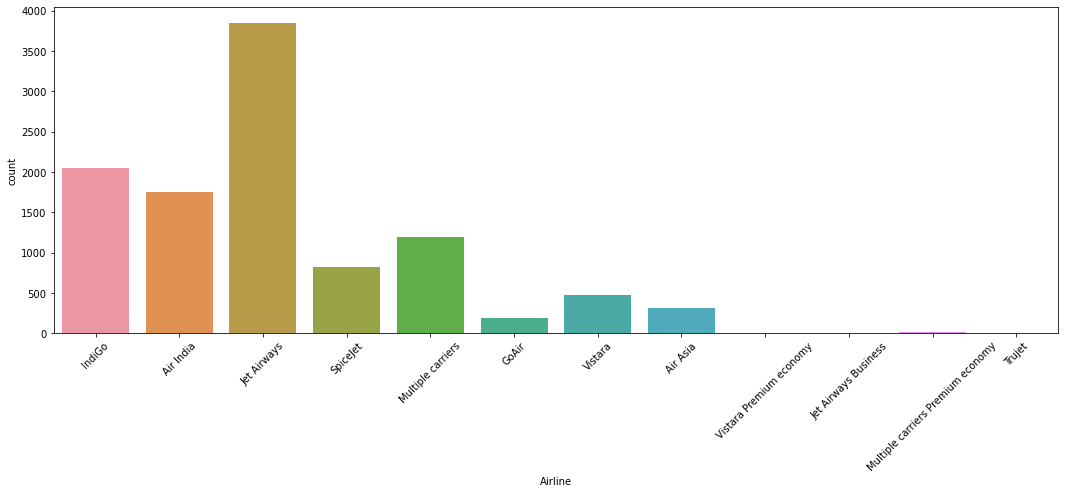

In [22]:
plt.figure(figsize = (18,6))
sns.countplot(x="Airline", data=df)
plt.xticks(Rotation =45 )

CONCLUSION:

    In dataset, we have large no of observation wit jet airways, Indigo and Air india. some neglegibles are like vistara, trujet etc

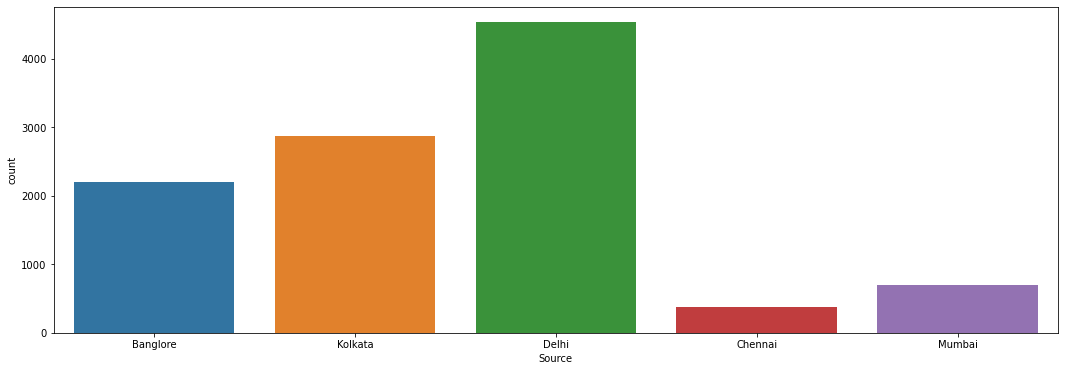

In [23]:
plt.figure(figsize = (18,6))
sns.countplot(x="Source", data=df)

CONCLUSION:
    
    In dataset, we have higher no of observation with source place Delhi and Kolkata

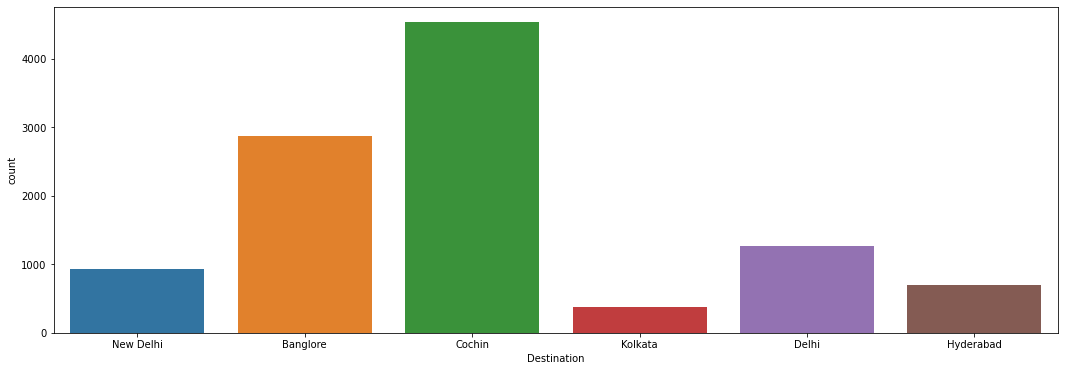

In [26]:
plt.figure(figsize = (18,6))
sns.countplot(x="Destination", data=df)

CONCLUSION:
    
    In destination, we have higher no of counts with cochin and Bangalore.

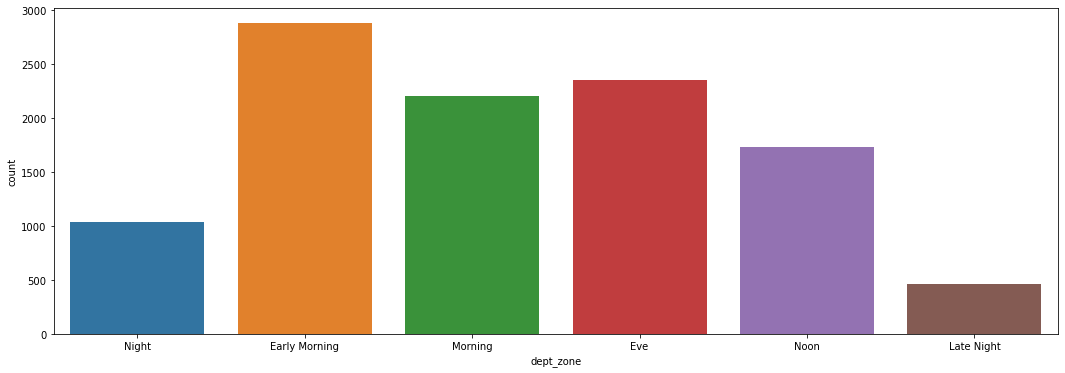

In [28]:
plt.figure(figsize = (18,6))
sns.countplot(x="dept_zone", data=df)

CONCLUSION:
    
    Flights availability is higher in early morning, morning and evening slot while in late night, no of flights availability is low.

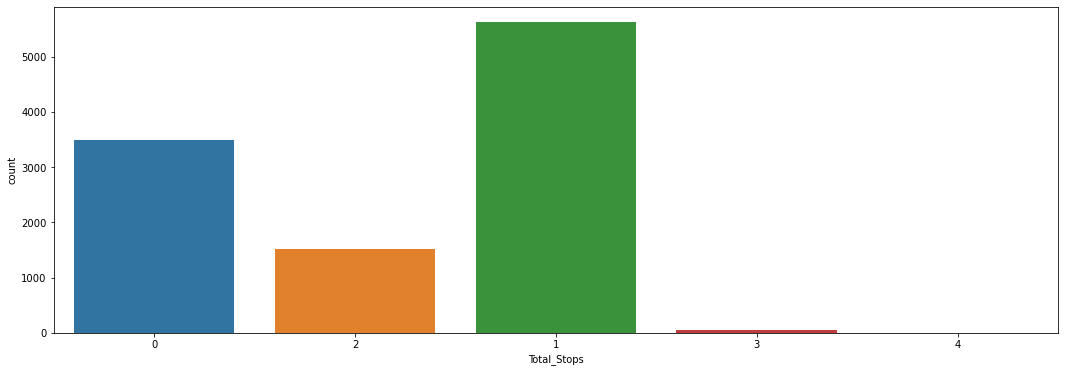

In [30]:
plt.figure(figsize = (18,6))
sns.countplot(x="Total_Stops", data=df)

CONCLUSION:
    
    No of stops are commonly 1 or 0 while in some flights there are 3 stops

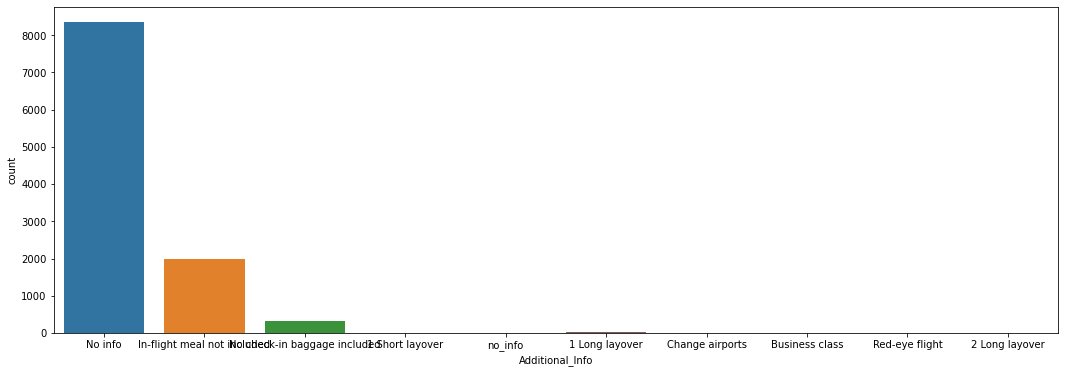

In [31]:
plt.figure(figsize = (18,6))
sns.countplot(x="Additional_Info", data=df)

CONCLUSION:

    Not looking much informative as there are high no of no addition info tabs are there.

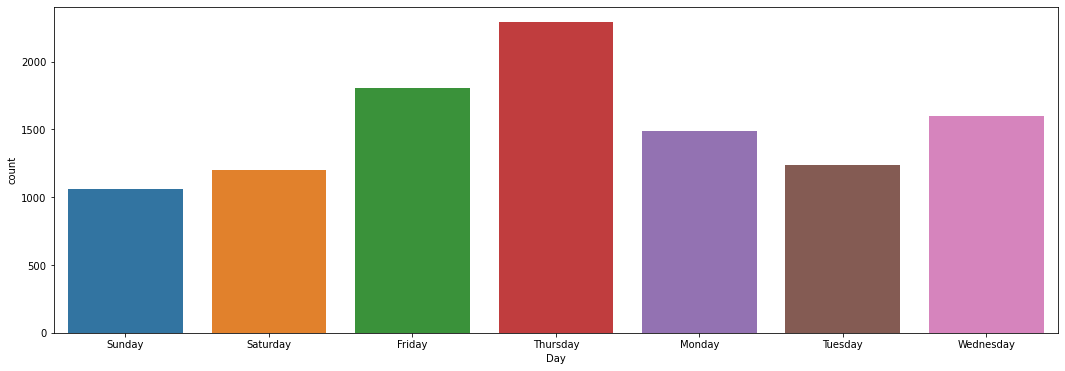

In [32]:
plt.figure(figsize = (18,6))
sns.countplot(x="Day", data=df)

CONCLUSION:
        
        No of flights are higher on thursday and friday.

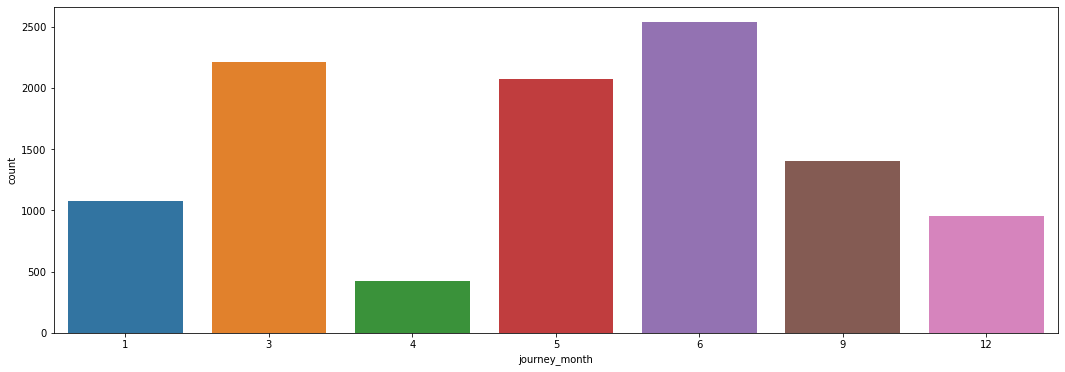

In [33]:
plt.figure(figsize = (18,6))
sns.countplot(x="journey_month", data=df)

CONCLUSION:
    
    In month of June and march, no of flights are higher

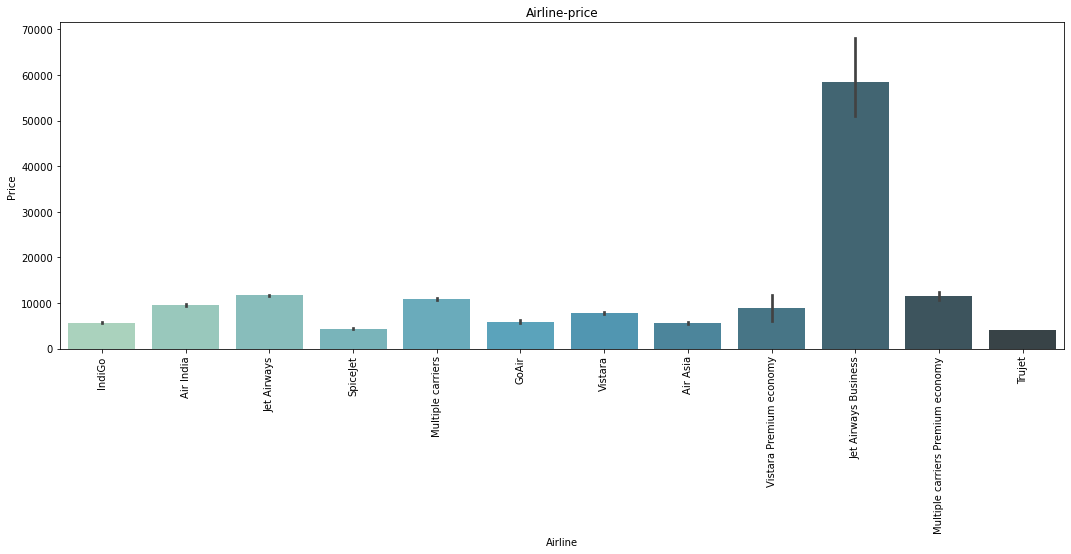

In [34]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Airline', y = 'Price', data = df, palette= 'GnBu_d',).set_title('Airline-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    Price of Jetways airline is higherst and cheapest is spicejet.

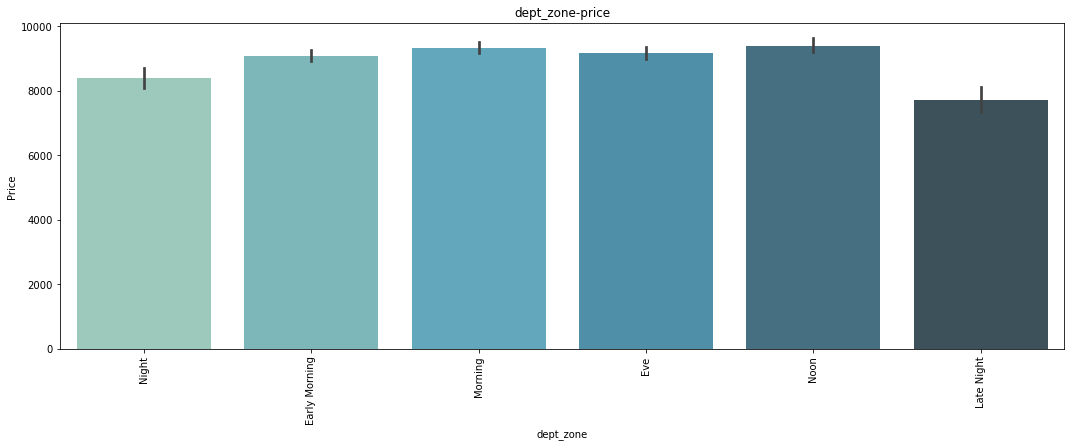

In [35]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'dept_zone', y = 'Price', data = df, palette= 'GnBu_d',).set_title('dept_zone-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    ZOne is not much effective as in only late night zone, price is lower comparativily.

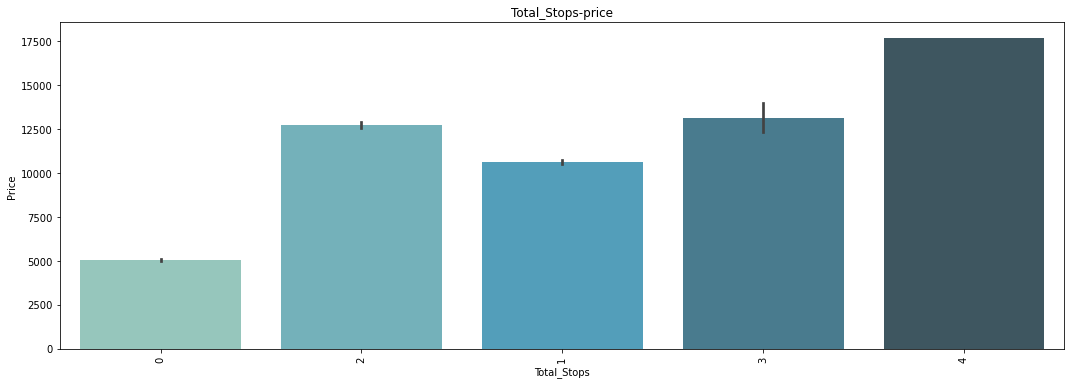

In [36]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Total_Stops', y = 'Price', data = df, palette= 'GnBu_d',).set_title('Total_Stops-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    Price of 0 stop flight is low as we can know that it leads to less travelling time.

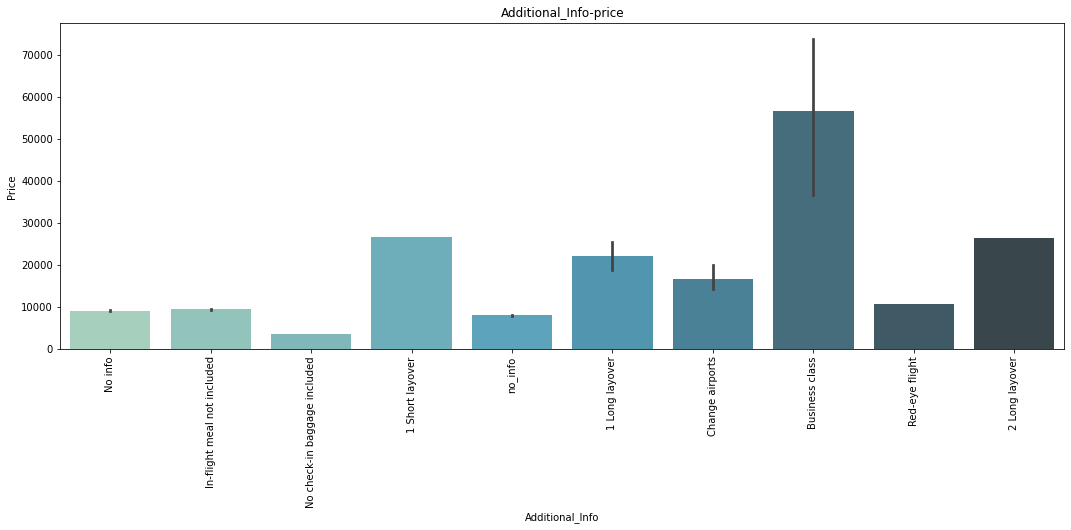

In [37]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Additional_Info', y = 'Price', data = df, palette= 'GnBu_d',).set_title('Additional_Info-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    Business class flight ticket have higher price while no check in luggage have low price

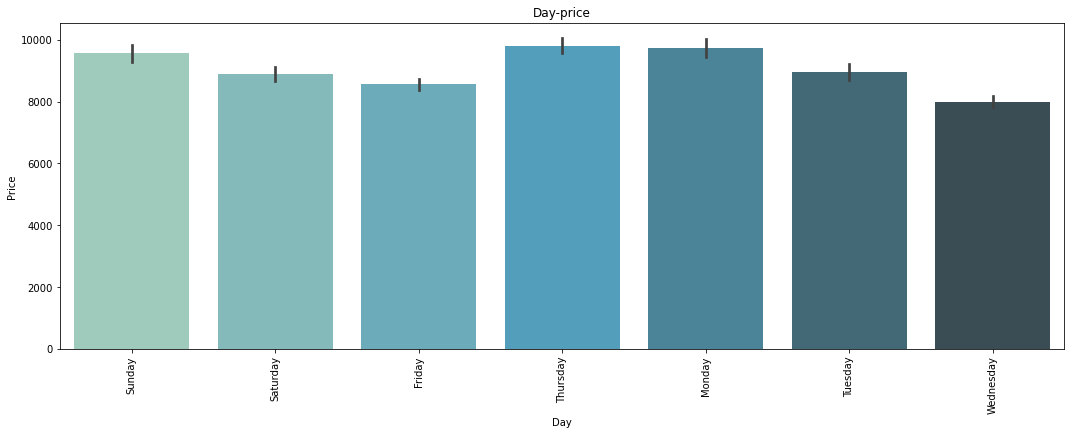

In [38]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Day', y = 'Price', data = df, palette= 'GnBu_d',).set_title('Day-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    As no of flights are higher on thursday price of ticket is also increase

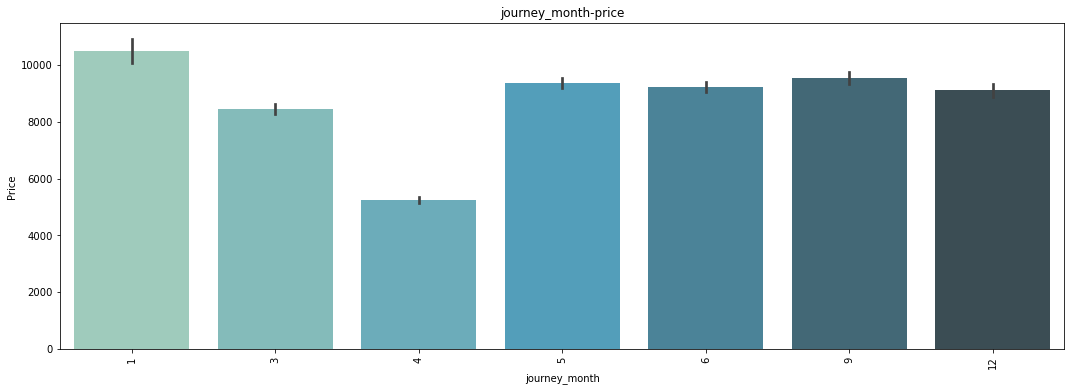

In [39]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'journey_month', y = 'Price', data = df, palette= 'GnBu_d',).set_title('journey_month-price')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    Price is Lower in April month apart from it there is no much effect on month.

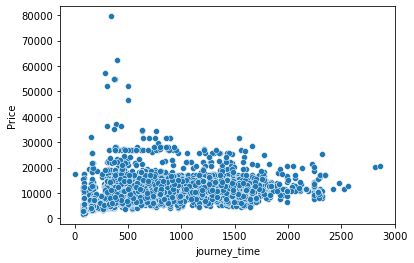

In [40]:
sns.scatterplot(x='journey_time',y='Price',data=df)

CONCLUSION:
    
    As journey time low, price of flight ticket is higher.

In [41]:
df

,Airline,Source,Destination,dept_zone,Total_Stops,Additional_Info,Price,Day,journey_time,journey_month
0,IndiGo,Banglore,New Delhi,Night,0,No info,3897,Sunday,170.0,3
1,Air India,Kolkata,Banglore,Early Morning,2,No info,7662,Saturday,445.0,1
2,Jet Airways,Delhi,Cochin,Morning,2,No info,13882,Friday,1140.0,9
3,IndiGo,Kolkata,Banglore,Eve,1,No info,6218,Thursday,325.0,12
4,IndiGo,Banglore,New Delhi,Noon,1,No info,13302,Thursday,285.0,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Eve,0,No info,4107,Wednesday,150.0,9
10679,Air India,Kolkata,Banglore,Eve,0,No info,4145,Saturday,155.0,4
10680,Jet Airways,Banglore,Delhi,Early Morning,0,No info,7229,Saturday,180.0,4
10681,Vistara,Banglore,New Delhi,Morning,0,No info,12648,Thursday,160.0,1


In [44]:
df1 = df.loc[(df['Source'] == 'Kolkata') & (df['Destination'] == 'Banglore')]
df1


#let we check changes of all factor wit reference to selected source "Kolkata" and selected destination "Bangalore"

,Airline,Source,Destination,dept_zone,Total_Stops,Additional_Info,Price,Day,journey_time,journey_month
1,Air India,Kolkata,Banglore,Early Morning,2,No info,7662,Saturday,445.0,1
3,IndiGo,Kolkata,Banglore,Eve,1,No info,6218,Thursday,325.0,12
5,SpiceJet,Kolkata,Banglore,Morning,0,No info,3873,Monday,145.0,6
11,IndiGo,Kolkata,Banglore,Eve,0,No info,4174,Thursday,155.0,4
13,Jet Airways,Kolkata,Banglore,Night,1,In-flight meal not included,9663,Thursday,730.0,9
...,...,...,...,...,...,...,...,...,...,...
10662,Air India,Kolkata,Banglore,Morning,2,No info,12352,Sunday,1210.0,3
10665,IndiGo,Kolkata,Banglore,Noon,0,No info,4804,Saturday,150.0,4
10670,Air India,Kolkata,Banglore,Early Morning,2,No info,11411,Thursday,1045.0,12
10678,Air Asia,Kolkata,Banglore,Eve,0,No info,4107,Wednesday,150.0,9


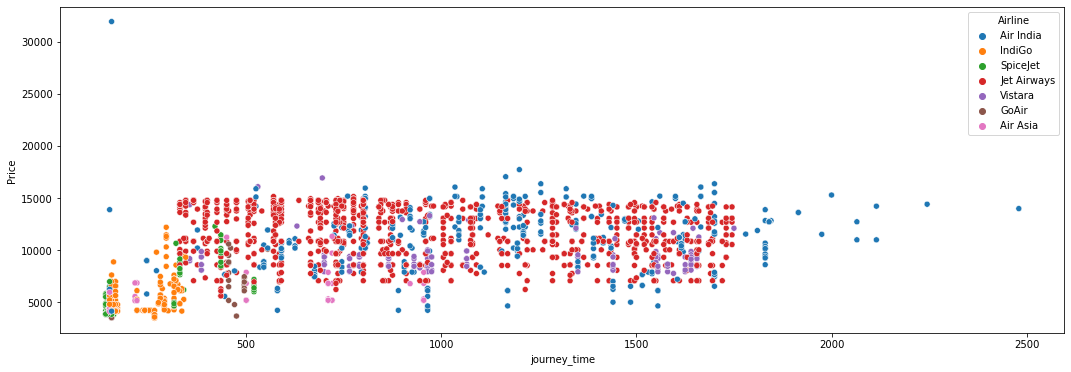

In [45]:
plt.figure(figsize = (18,6))
sns.scatterplot(x='journey_time',y='Price',hue = 'Airline',data=df1)

CONCLUSION:
    
    Not much clear but we can see that price is high when journey time is low and jet airways ave average high price

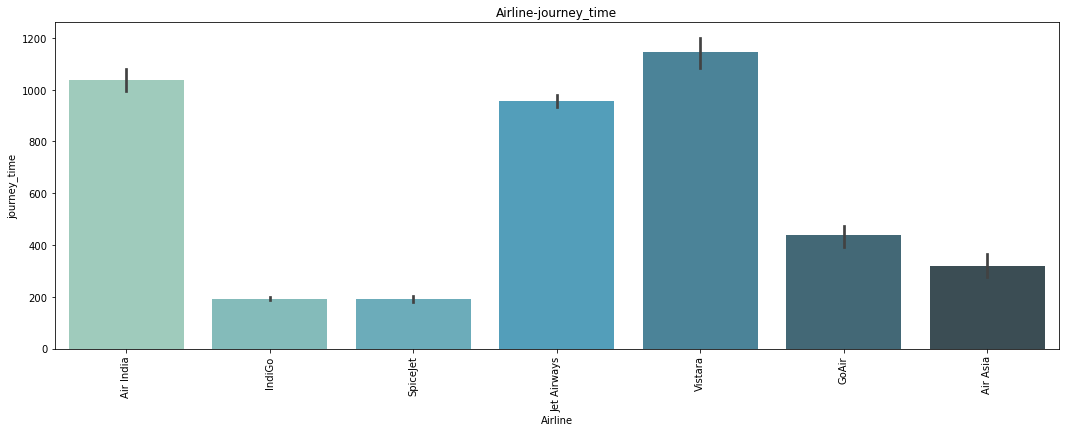

In [46]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'Airline', y = 'journey_time', data = df1, palette= 'GnBu_d',).set_title('Airline-journey_time')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:

    Price is higher for vistara and air india while it is low of spicejet and indiGo.

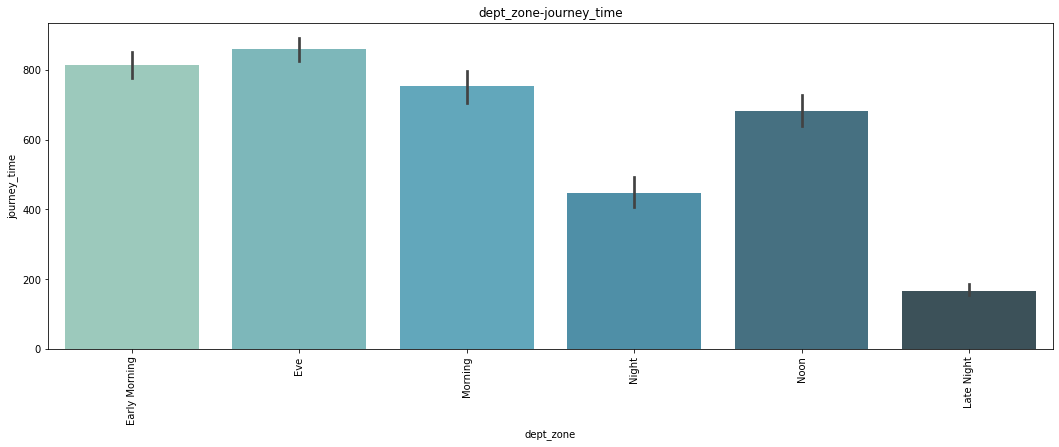

In [47]:
plt.figure(figsize = (18,6))
sns.barplot(x = 'dept_zone', y = 'journey_time', data = df1, palette= 'GnBu_d',).set_title('dept_zone-journey_time')
plt.xticks(Rotation = 90)
plt.show()

CONCLUSION:
    
    PRICE is low in late night fligt and night flight

In [48]:
df

,Airline,Source,Destination,dept_zone,Total_Stops,Additional_Info,Price,Day,journey_time,journey_month
0,IndiGo,Banglore,New Delhi,Night,0,No info,3897,Sunday,170.0,3
1,Air India,Kolkata,Banglore,Early Morning,2,No info,7662,Saturday,445.0,1
2,Jet Airways,Delhi,Cochin,Morning,2,No info,13882,Friday,1140.0,9
3,IndiGo,Kolkata,Banglore,Eve,1,No info,6218,Thursday,325.0,12
4,IndiGo,Banglore,New Delhi,Noon,1,No info,13302,Thursday,285.0,1
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,Eve,0,No info,4107,Wednesday,150.0,9
10679,Air India,Kolkata,Banglore,Eve,0,No info,4145,Saturday,155.0,4
10680,Jet Airways,Banglore,Delhi,Early Morning,0,No info,7229,Saturday,180.0,4
10681,Vistara,Banglore,New Delhi,Morning,0,No info,12648,Thursday,160.0,1


In [49]:
objList = df.select_dtypes(include = "object").columns
print (objList)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['Airline', 'Source', 'Destination', 'dept_zone', 'Total_Stops',
       'Additional_Info', 'Day'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  int32  
 1   Source           10682 non-null  int32  
 2   Destination      10682 non-null  int32  
 3   dept_zone        10682 non-null  int32  
 4   Total_Stops      10682 non-null  int32  
 5   Additional_Info  10682 non-null  int32  
 6   Price            10682 non-null  int64  
 7   Day              10682 non-null  int32  
 8   journey_time     10682 non-null  float64
 9   journey_month    10682 non-null  int64  
dtypes: float64(1), int32(7), int64(2)
memory usage: 945.9 KB
None


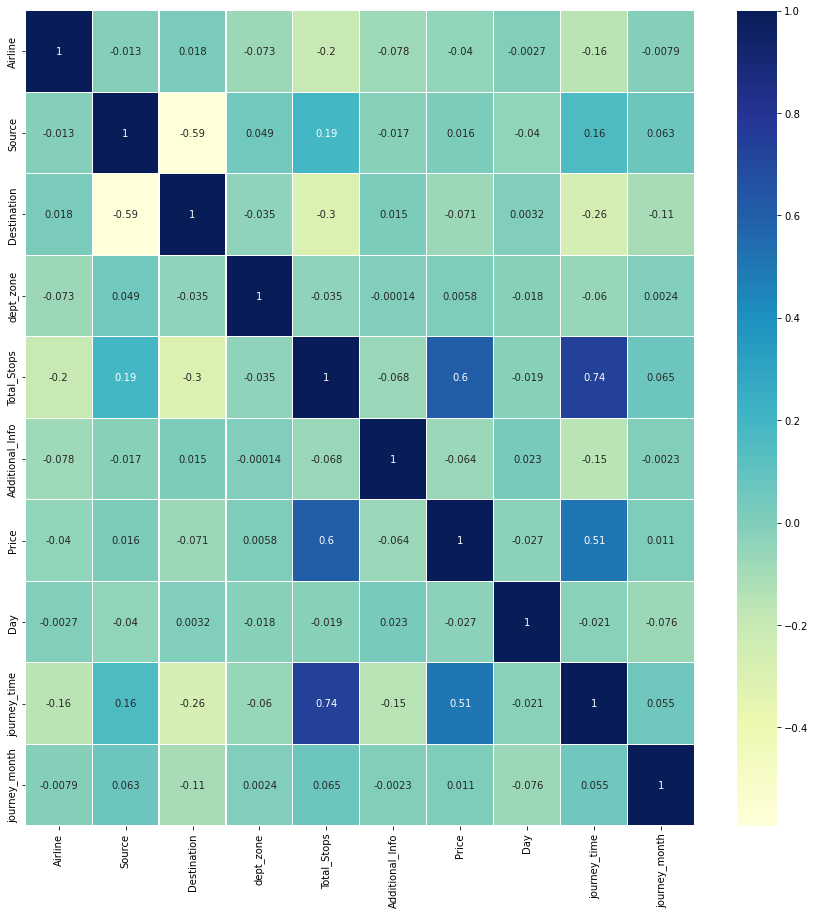

In [50]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrmat, annot=True, cmap="YlGnBu", linewidths=0.1, annot_kws={"fontsize":10});

CONCLUSION:
    
    
    1) Price is directly effective with Journey time and total stops.
    2) Total stops is inversly co-related with journey time.
    3) Source have co-relation with stops and journey time as distance increase then travelling time also increase and
       total stops also may be increase.
    4) Journey month and journey day have no much co-relation with any variable.


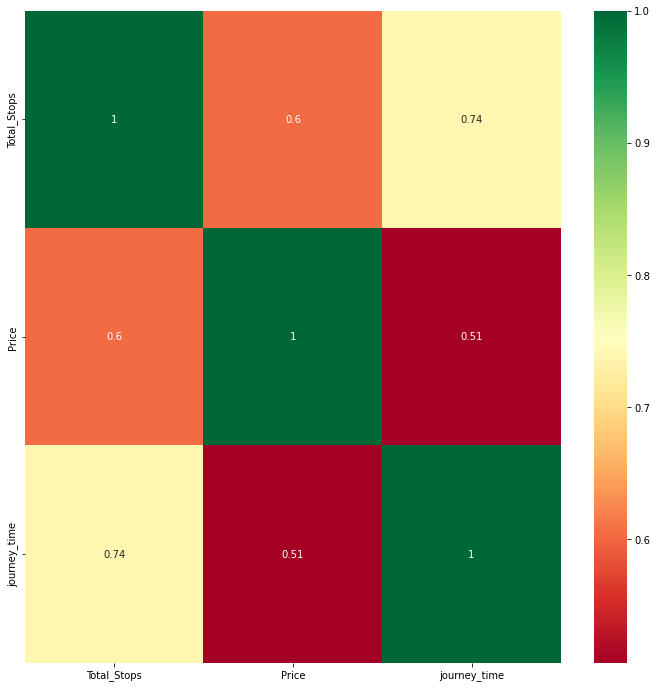

In [51]:
plt.figure(figsize=(12,12))
top_corr_features = corrmat.index[abs(corrmat["Price"])>0.5]
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

CONCLUSION:
    
    As we can see that two highly co-related variable with target is " Journey time" and " Total Stops ".
    

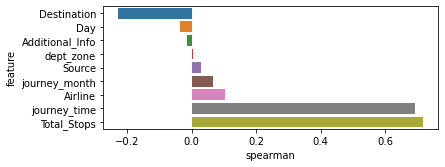

In [52]:
def spearman(frame, features):
    spr = pd.DataFrame()
    spr['feature'] = features
    spr['spearman'] = [frame[f].corr(frame['Price'], 'spearman') for f in features]
    spr = spr.sort_values('spearman')
    plt.figure(figsize=(6, 0.25*len(features)))
    sns.barplot(data=spr, y='feature', x='spearman', orient='h')

features = corrmat[['Price']].sort_values(['Price'], ascending=False)
features = [f for f in features.index if f != 'Price']

spearman(df, features)

CONCLUSION:
    
    1) As we can see that two highly co-related variable with target is " Journey time" and " Total Stops ".
    2) Dept zone and addition info are not effective towards the target so we can remove it.
    

In [53]:
df = df.drop(['dept_zone','Additional_Info'], axis = 1)

### PRE_PROCESSING FOR BETTER ACCURACY

#### SKEWNESS REMOVEL

In [56]:
df.skew()

Airline          0.731057
Source          -0.424023
Destination     -0.504911
Total_Stops      0.317109
Price            0.170183
Day             -0.065171
journey_time     0.861411
journey_month    0.629556
dtype: float64

In [57]:
from scipy.stats import boxcox

for col in df:
    if df[col].skew()>=1:
        df[col]=np.cbrt(df[col]) 

        
        # here, i use cuberoot method to remove skewness.

In [58]:
df.skew()

Airline          0.731057
Source          -0.424023
Destination     -0.504911
Total_Stops      0.317109
Price            0.170183
Day             -0.065171
journey_time     0.861411
journey_month    0.629556
dtype: float64

#### Outlier removel 

In [59]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df=df.loc[(z_score<3).all(axis=1)]
print(df.shape)

#here, we can see that no of outliers removed are nearly 150  which can be acceptable.

(10682, 8)
(10558, 8)


In [60]:
x =df.drop('Price',axis=1)
y =df['Price']

#### Scale down the dataset 

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,train_size = 0.7)

### FEATURE SELECTION

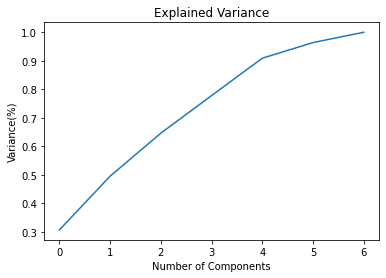

In [63]:
from sklearn.decomposition import PCA
pca = PCA()
PrincipalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')
plt.title('Explained Variance')
plt.show()

Here we can see that graph is quite in proposnal to both variable where we must need all 6 variable to cover 100% variance.
 PCA is not effective.

In [64]:
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    ln=LinearRegression()
    ln.fit(x_train,y_train)
    if round(ln.score(x_train,y_train)*100,2)==round(ln.score(x_test,y_test)*100,2):
        print('At random state',i,'score is best')
        print('Train score',ln.score(x_train,y_train)*100)
        print('Test Score',ln.score(x_test,y_test))

At random state 435 score is best
Train score 51.586699220061384
Test Score 0.5158932631200994


In [65]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred=ln.predict(x_test)
print('Train Score',ln.score(x_train,y_train)*100)
print('Testing:-',ln.score(x_test,y_test)*100)
print('Error')
print('MAE',mean_absolute_error(y_test,pred))
print('MSE',mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
print('R2 Score',r2_score(y_test,pred)*100)

Train Score 52.18428827965857
Testing:- 49.147356790696215
Error
MAE 1.911260396936656
MSE 5.61866241674912
RMSE 2.370371788717778
R2 Score 49.147356790696215


In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, r2_score


In [67]:
dtr=DecisionTreeRegressor()
svr=SVR()
svrl=SVR(kernel='linear')
kn=KNeighborsRegressor(n_neighbors=5)

Now we will define a function to predict model for dataset.

In [68]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('TRAINING:-',f.score(x_train,y_train)*100)
    print('Testing:-',f.score(x_test,y_test)*100)
    print('MAE',mean_absolute_error(y_test,pred))
    print('MSE',mean_squared_error(y_test,pred))
    print('RMSE',np.sqrt(mean_squared_error(y_test,pred)))
    print('R2 Score',r2_score(y_test,pred)*100)

### DECISIONTREE REGRESSOR

In [69]:
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
print("DecisionTreeRegressor")
print('Training Score:-',dtr.score(x_train,y_train)*100)
print('Testing:-',dtr.score(x_test,y_test)*100)
print('MAE',mean_absolute_error(y_test,preddtr))
print('MSE',mean_squared_error(y_test,preddtr))
print('RMSE',np.sqrt(mean_squared_error(y_test,preddtr)))
print('R2 Score',r2_score(y_test,preddtr)*100)

DecisionTreeRegressor
Training Score:- 94.06094660244918
Testing:- 69.40188309055912
MAE 1.2491506512364172
MSE 3.3807581799586246
RMSE 1.838683817288504
R2 Score 69.40188309055912


In [70]:
dtr_pred = dtr.predict(x_test)
dtr_pred= dtr_pred.reshape(-1,1)

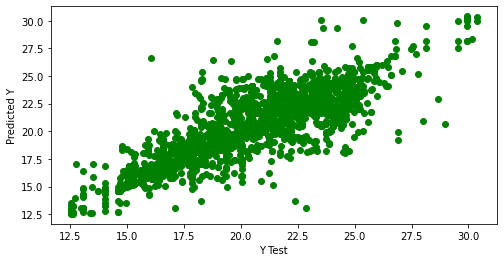

In [71]:
plt.figure(figsize=(8,4))
plt.scatter(y_test,dtr_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()


CONCLUSION FOR DECISION TREE REGRESSOR:
    
    Not looking much intresting as there is high difference between training and testing score.

### SUPPORT VECTOR REGRESSOR

In [72]:
fun(svr)

TRAINING:- 68.54206619933612
Testing:- 67.4174822233865
MAE 1.4228812567008509
MSE 3.6000128316048805
RMSE 1.8973699775228026
R2 Score 67.4174822233865


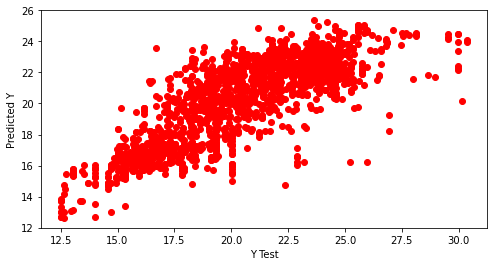

In [73]:
svr_pred = svr.predict(x_test)
svr_pred= svr_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,svr_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION FOR SUPPORT VECTOR REGRESSOR:
    
    We are getting nearly 68% accuracy in training and testing score, while error is also low.

In [74]:
fun(kn)

TRAINING:- 84.7351156014758
Testing:- 76.53303412128652
MAE 1.185475155391741
MSE 2.5928437716633415
RMSE 1.6102309684214067
R2 Score 76.53303412128652


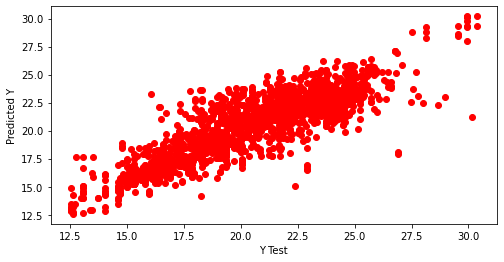

In [75]:
kn_pred = kn.predict(x_test)
plt.figure(figsize=(8,4))
plt.scatter(y_test,kn_pred, c='red')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION FOR K-NEIGHBOUR REGRESSOR:
    
    In training dataset, accuracy is 84% while and in testing score accuracy is 76%.

### RANDOM FOREST REGRESSOR

In [76]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
fun(rd)

TRAINING:- 92.77439069625065
Testing:- 77.65147424099854
MAE 1.1221175680810107
MSE 2.4692683374396855
RMSE 1.5713905744402585
R2 Score 77.65147424099854


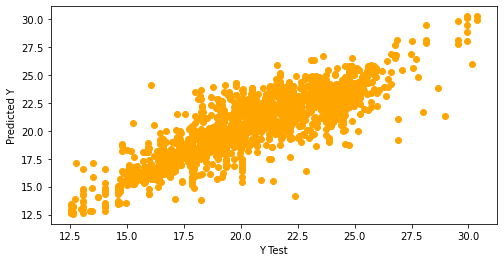

In [77]:
rd_pred= rd.predict(x_test)
rd_pred = rd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,rd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION FOR RANDOM FOREST REGRESSOR:
    
    TEsting accuracy is 77% in dataset.

### ADABOOST REGRESSOR

In [78]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
fun(ad)

TRAINING:- 62.023660166246856
Testing:- 60.64157840278648
MAE 1.7269296474280686
MSE 4.348676297918992
RMSE 2.085348004031699
R2 Score 60.64157840278648


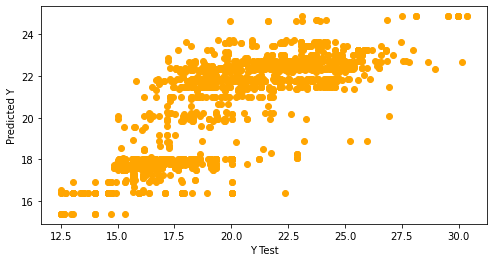

In [79]:
ad_pred= ad.predict(x_test)
ad_pred = ad_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,ad_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION FOR ADABOOST REGRESSOR:

    Lower accuracy as compare to other models

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()
fun(gd)

TRAINING:- 78.73786347132928
Testing:- 77.40092771789801
MAE 1.2156661361400423
MSE 2.4969509954914617
RMSE 1.5801743560415926
R2 Score 77.40092771789801


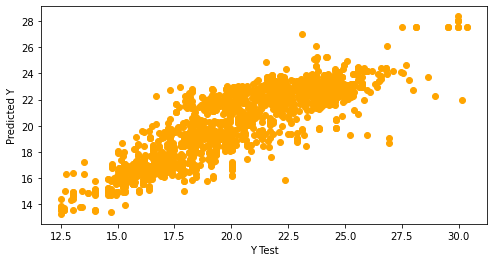

In [81]:
gd_pred= gd.predict(x_test)
gd_pred = gd_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd_pred, c='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION:
    
    In both, training and testing dataset, accuracy score is 78% and it is the best model from all model we tested.

### HYPER PARAMETER TUNING- RANDOM FOREST REGRESSOR

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [84]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator = rd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [85]:
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   49.4s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      120],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [2, 6, 10],
                                        'n_estimators': [5, 20, 50, 100]},
                   random_state=35, verbose=2)

In [86]:
print ('Random grid: ', random_grid, '\n')
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_, ' \n')

Random grid:  {'n_estimators': [5, 20, 50, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120], 'min_samples_split': [2, 6, 10], 'min_samples_leaf': [1, 3, 4], 'bootstrap': [True, False]} 

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True}  



In [87]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 10, 
                               min_samples_leaf= 2, max_features = 'auto', max_depth= 40, 
                               bootstrap=True) 
randmf.fit( x_train, y_train) 


RandomForestRegressor(max_depth=40, min_samples_leaf=2, min_samples_split=10)

In [88]:
fun(randmf)

TRAINING:- 88.44404676833709
Testing:- 80.71836170968356
MAE 1.0629573761236237
MSE 2.130410723180085
RMSE 1.4595926565929567
R2 Score 80.71836170968356


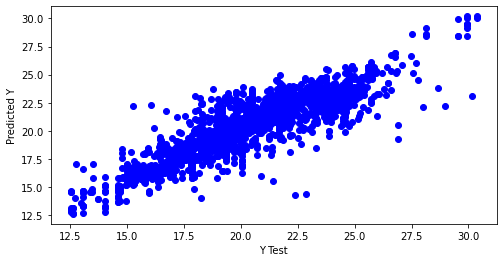

In [89]:
randmf_pred= randmf.predict(x_test)
randmf_pred = randmf_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,randmf_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION:
    
     AS we can see that by doing hyper parameter tuning, we got 3% high accuracy then normal random forest model.

### GRADIENT BOOST REGRESSOR - HYPER PARAMETER TUNING

In [90]:
n_estimators = [20,50,100,600] # number of trees in the random forest
learning_rate = [.001,0.01,.1]
max_depth = [1,2,4,5,10] # maximum number of levels allowed in each decision tree
min_samples_split = [10,50,100,500] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
random_state = [1] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'learning_rate' : learning_rate,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'random_state': random_state}

In [91]:
GBR = RandomizedSearchCV(estimator = gd,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)

In [92]:
GBR.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.1min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [1, 2, 4, 5, 10],
                                        'min_samples_leaf': [1, 3, 4],
                                        'min_samples_split': [10, 50, 100, 500],
                                        'n_estimators': [20, 50, 100, 600],
                                        'random_state': [1]},
                   random_state=35, verbose=2)

In [93]:
GBR.best_params_

{'random_state': 1,
 'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 3,
 'max_depth': 5,
 'learning_rate': 0.1}

In [94]:
GD1 = GradientBoostingRegressor(n_estimators = 600, min_samples_split = 40, 
                               min_samples_leaf= 4,max_depth = 6, learning_rate = 0.1) 
GD1.fit(x_train, y_train) 

GradientBoostingRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=40,
                          n_estimators=600)

In [95]:
fun(GD1)

TRAINING:- 89.72097480398827
Testing:- 83.99021632414183
MAE 0.9674404301077683
MSE 1.7689064749218462
RMSE 1.3300024341789176
R2 Score 83.99021632414183


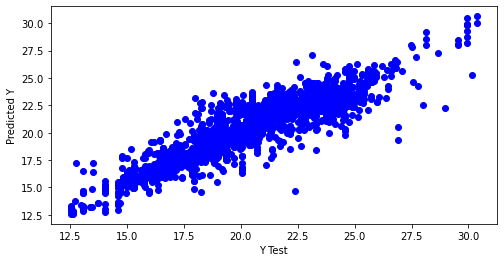

In [96]:
gd1_pred= GD1.predict(x_test)
gd1_pred = gd1_pred.reshape(-1,1)
plt.figure(figsize=(8,4))
plt.scatter(y_test,gd1_pred, c='blue')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

CONCLUSION:
    
    Highest accuracy from all model and it is the best fit model, we will go forward with model.

### CROSS VALIDATION TECHNIQUE

In [97]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(svr,x_scaled,y,cv=5)
print("score of cross validation score for svr", score.mean()*100)
score=cross_val_score(dtr,x_scaled,y,cv=5)
print("score of cross validation score for dtr",score.mean()*100)
score=cross_val_score(rd,x_scaled,y,cv=5)
print("score of cross validation score for rd",score.mean()*100)
score=cross_val_score(gd,x_scaled,y,cv=5)
print("score of cross validation score for Gd",score.mean()*100)
score=cross_val_score(ad,x_scaled,y,cv=4)
print("score of cross validation score for ad",score.mean()*100)
score=cross_val_score(randmf,x_scaled,y,cv=4)
print('score of cross validation score for rd hyper',score.mean()*100)
score=cross_val_score(GD1,x_scaled,y,cv=4)
print('score of cross validation score for gd hyper',score.mean()*100)

score of cross validation score for svr 67.64604460732461
score of cross validation score for dtr 69.6672906873677
score of cross validation score for rd 77.87629114115558
score of cross validation score for Gd 77.6127960591505
score of cross validation score for ad 63.67091518293395
score of cross validation score for rd hyper 80.85881048467462
score of cross validation score for gd hyper 83.61071122941004


In [98]:
import pickle
filename='Flight_price_intern.pkl'
pickle.dump(GD1,open(filename,'wb'))

          Actual    Predict
10423  15.798248  16.430943
3628   16.895553  16.584021
5984   24.504372  21.203045
4521   29.523968  28.433288
2933   15.033997  15.642147
...          ...        ...
837    23.192462  22.840725
9794   18.641477  19.761307
2130   18.186336  17.989809
1178   16.463033  16.473597
859    20.476873  22.937221

[2112 rows x 2 columns]


Text(0.5, 1.0, 'Regressor Line')

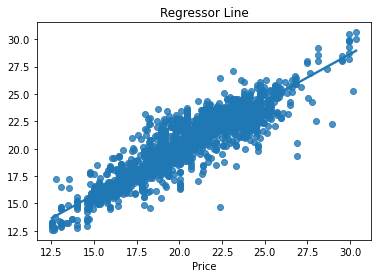

In [99]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=gd1_pred

res

print(res)
sns.regplot(y_test,gd1_pred)
plt.title('Regressor Line')

### --------------------------------------------------------------THANK YOU---------------------------------------------------------------------------------